# 作业1：Numpy练习

本次作业主要对Python中的矩阵运算库Numpy进行练习。如遇到不清楚的函数或主题，可以查阅[官方文档](https://numpy.org/doc/stable/user/index.html)或利用搜索引擎寻求帮助。

### 基础知识

本节对Numpy进行简要介绍，没有实际的题目，可直接运行每一个单元格。

首先导入Numpy包：

In [1]:
import numpy as np

利用Numpy可以方便地创建向量和矩阵：

In [2]:
vec = np.array([1.0, 2.0, 5.0])
print(vec)

[1. 2. 5.]


In [3]:
mat = np.array([[1.0, 2.0, 2.0], [3.0, 5.0, 4.5]])
print(mat)

[[1.  2.  2. ]
 [3.  5.  4.5]]


In [4]:
vec = np.linspace(start=1.0, stop=5.0, num=12)
print(vec)

[1.         1.36363636 1.72727273 2.09090909 2.45454545 2.81818182
 3.18181818 3.54545455 3.90909091 4.27272727 4.63636364 5.        ]


In [5]:
mat = np.reshape(vec, (3, 4))
print(mat)

[[1.         1.36363636 1.72727273 2.09090909]
 [2.45454545 2.81818182 3.18181818 3.54545455]
 [3.90909091 4.27272727 4.63636364 5.        ]]


Python中下标是从0开始的，请一定要记住这一点，否则会造成很多逻辑错误。

In [6]:
print(vec[0])
print(vec[2])
print(mat[1, 1])

1.0
1.7272727272727273
2.8181818181818183


负数的下标表示从尾部往前数：

In [7]:
print(vec[-1])
print(vec[-2])
print(mat[1, -1])

5.0
4.636363636363637
3.5454545454545454


可以用冒号选取向量中的一段范围，格式为`x[start:end]`，选出的元素包含`x[start]`，不包含`x[end]`。

In [8]:
print(vec[1:3])

[1.36363636 1.72727273]


In [9]:
print(mat[:, :2])

[[1.         1.36363636]
 [2.45454545 2.81818182]
 [3.90909091 4.27272727]]


在编写函数时，经常需要各种测试数据，此时可以用Numpy来生成各类随机数。在需要用到随机数之前，一定要先设置随机数种子，以使结果可重复。

In [10]:
np.random.seed(123)

生成均匀分布随机数：

In [11]:
unif = np.random.uniform(low=0.0, high=1.0, size=5)
print(unif)

[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897]


正态分布随机数：

In [12]:
norm = np.random.normal(loc=0.0, scale=1.0, size=(2, 5))
print(norm)

[[ 0.32210607 -0.05151772 -0.20420096  1.97934843 -1.61930007]
 [-1.11396442 -0.44744072  1.66840161 -0.14337247 -0.6191909 ]]


Numpy提供了许多数学函数对向量和矩阵进行操作：

In [13]:
print(np.exp(norm))

[[1.38003115 0.94978682 0.81529851 7.23802539 0.19803726]
 [0.32825504 0.63926211 5.30368367 0.86643129 0.53837986]]


In [14]:
print(np.log(unif))

[-0.36173173 -1.2512764  -1.48345987 -0.59544936 -0.32924188]


也可以对向量和矩阵进行汇总：

In [15]:
np.sum(unif)

2.4802437129808985

In [16]:
np.mean(norm)

-0.02291311494411293

汇总可以按行或者按列进行，这由`axis`参数决定。0表示运算时第一个维度（行）在变化，1表示运算时第二个维度（列）在变化。
再次提醒，Python中以0表示第一个元素！

In [17]:
np.mean(norm, axis=0)  # 对第一个维度（行标在变化）求均值

array([-0.39592917, -0.24947922,  0.73210032,  0.91798798, -1.11924548])

In [18]:
np.var(norm, axis=1)  # 对第二个维度（列标在变化）求方差

array([1.33033757, 0.90853666])

### 第1题

(a) 生成10000个服从(0, 1)间均匀分布的随机数，赋值给变量`x`，并打印其**前10个**元素。

In [20]:
np.random.seed(123)
x=np.random.uniform(low=0.0,high=1.0,size=10000)
print(x[:10])

[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897 0.42310646
 0.9807642  0.68482974 0.4809319  0.39211752]


(b) 创建向量`y`，令其在数学上等于`y=-log(x)`，其中`log`为自然对数。打印`y`的**最后10个**元素。

In [21]:
y = -np.log(x)
y[-10:]

array([1.13410426, 1.86024285, 0.80680447, 1.67802918, 0.63341567,
       1.03629983, 0.53604049, 0.0149665 , 1.51112261, 0.48890569])

(c) 查找在Python中绘制图形的方法，绘制`y`的直方图。

Text(0.5, 1.0, 'histogram of y')

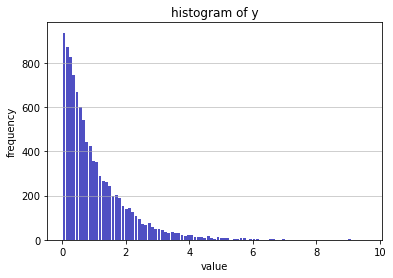

In [23]:
import matplotlib.pyplot as plt
hist,bin_edges=np.histogram(y)
patches=plt.hist(y,bins="auto",color='#0504aa',alpha=0.7,rwidth=0.85)
plt.grid(axis="y",alpha=0.75)
plt.xlabel("value")
plt.ylabel("frequency")
plt.title("histogram of y")

(d) 猜测或证明`y`服从什么分布，并简要说明理由。

### 第2题

(a) 考虑Sigmoid函数 $$\sigma(x)=\frac{e^x}{1+e^x}$$

请在Python中编写一个函数`sigmoid(x)`，令其可以接收一个向量`x`，返回Sigmoid函数在`x`上的取值。

In [24]:
sigmonid = lambda x:1/(1+np.exp(-x))

(b) 创建向量`x`，使其包含元素-1000, -100, -10, 0, 10, 100, 1000。在`x`上调用上面编写的函数，返回的结果是什么？是否出现警告或错误？

In [25]:
sigmonid(np.array([-1000, -100, -10, 0, 10, 100, 1000]))

<ipython-input-24-0b882c804e71>:1: RuntimeWarning: overflow encountered in exp
  sigmonid = lambda x:1/(1+np.exp(-x))


array([0.00000000e+00, 3.72007598e-44, 4.53978687e-05, 5.00000000e-01,
       9.99954602e-01, 1.00000000e+00, 1.00000000e+00])

(c) 如果出现警告或错误，思考可能的原因是什么。（提示：Sigmoid函数真实的取值范围是多少？分子和分母的取值范围又是什么？是否可以对Sigmoid函数的表达式进行某种等价变换？）如果一切正常，可忽略此问题。

(d) 请再次尝试编写`sigmoid(x)`函数，使其在给定的数据上顺利计算结果。可在网上搜索相关主题寻求帮助，但需给出来源。如果之前一切正常，可忽略此问题。

### 第3题

(a) 考虑Softplus函数 $$\mathrm{softplus}(x)=\log(1+e^x)$$

请在Python中编写一个函数`softplus(x)`，令其可以接收一个向量`x`，返回Softplus函数在`x`上的取值。

In [26]:
def softplus(x):
    return np.log(1+np.exp(x))

(b) 创建向量`x`，使其包含元素-1000, -100, -10, 0, 10, 100, 1000。在`x`上调用上面编写的函数，返回的结果是什么？是否出现警告或错误？

In [27]:
softplus(x)

array([1.10082818, 0.84641659, 0.81299186, ..., 1.30242351, 0.8095524 ,
       1.04609355])

(c) 如果出现警告或错误，参照第2题的方法，思考可能的原因是什么。如果一切正常，可忽略此问题。

(d) 请再次尝试编写`softplus(x)`函数，使其在给定的数据上顺利计算结果。可在网上搜索相关主题寻求帮助，但需给出来源。如果之前一切正常，可忽略此问题。